# 第４章　ニューラルネットワークの学習

人の考えたアルゴリズムで判断を行う段階から一歩進み、人の考えた得微量（SIFT,HOG）をつかって機械学習（SVM,KNN）などを使う段階、そして最終的にはニュ＝ラルネットワークを用いた機械のみでの判断＝ディープラーニングを目標としている。　

訓練データとテストーデータを用いて開発を行うのが一般的であるが、一つのデータを学習しすぎると過学習を起こしてしまい、あるデータセットにだけ過度に対応した状態になることがある。　　過学習を避けることは機械学習の重要な課題の一つだ。

# 損失関数

ニューラルネットワークの学習では一つsの指標を用いて現在の状態を表す。　　　　　　　　　　
そしてその指標を基準として最適な重みパラメータの捜索を行う。　　　　　　　　　　　　　　
この関数のことを損失関数という。

最も有名なものは２乗和誤差である。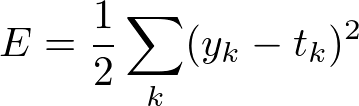

この式ではニューラルネットワークの出力の正解となる教師データの各要素の差の２乗を計算し、その総和を求めている。この２乗和誤差をPythonで実装してみる。

In [4]:
import numpy as np

In [5]:
def sum_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [6]:
t=[0,0,1,0,0,0,0,0,0,0]

In [7]:
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
sum_squared_error(np.array(y),np.array(t))

0.09750000000000003

In [8]:
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
sum_squared_error(np.array(y),np.array(t))

0.5975

１つ目のほうが損失関数が小さくなっており、誤差が小さいことがわかる、らしい

別の損失関数として、交差エントロピー誤差もよく用いられる。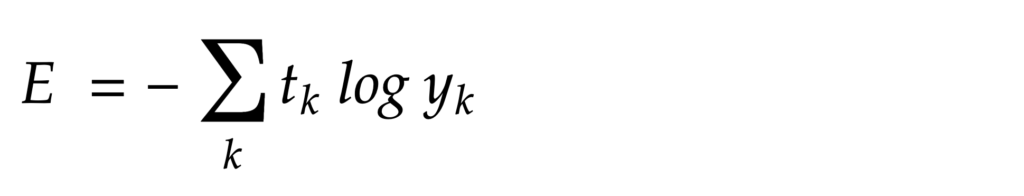

xが１のときはyは０になり、ｘが０に近づくにつれてｙは小さくなっていく。　　　　　　　　　　そして出力が１のとき交差エントロピー誤差は０になる。　　　　　　　　　　　　　　　　　　　　とにかく実装してみる。

In [9]:
def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))

In [10]:
t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [11]:
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))

2.302584092994546

数ある訓練データの中から一部を選び出して学習することをミニバッチ学習を言う。

In [12]:
from mnist import load_mnist

In [13]:
(x_train,t_train),(x_test,t_test)=\
   load_mnist(normalize=True,one_hot_label=True)

In [14]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [15]:
np.random.choice(60000,10)

array([37755, 11220,  9484, 32828, 43278, 21220, 42595,  7362, 48561,
       21802])

# 数値微分

微分とは、ある瞬間の変化の量を表したものである。数式で以下のように定義される。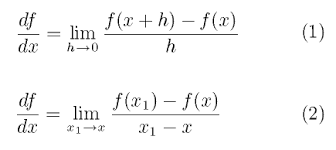

limh→0が限りなく０に近づいたh　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　
しかし、数値微分には誤差が含まれる。　　　　　　　　　　　　　　　　　　　　　　　　　　この誤差を減らす工夫として(x+h),(x-h)での関数fを差分とへらす工夫がある。　　　　　　　　　これを生かして数値微分（数値勾配）の実装を行う　　　　　　　　　　　　　　　　　　　　　　　　　　

In [16]:
def numerical_diff(f,x):
    h=1e-4 #0.0001
    return (f(x+h)-f(x-h))/(2*h)

偏微分　わからなかったので実装のみ

C:\Users\apple\AppData\Local\Temp/ipykernel_22572/676637264.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


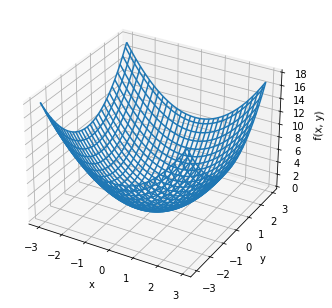

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
def func1(x, y):
    return x**2 + y**2
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = func1(X, Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.plot_wireframe(X, Y, Z)
plt.show()

すべての変数の偏微分をベクトルとしてまとめたものを勾配という。勾配は、例えば次のように実装できる

In [18]:
def numerical_gradient(f,x):
    h=1e-4 #0.0001
    grad=np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val=x[idx]
        x[idx]=tmp_val+h
        fxh1=f(x)
        
        x[ids]=tmp_val-h
        fxh2=f(x)
        
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val
        
    return grad

# 勾配法

機械学習の問題の多くは学習に最適なパラメータを探索する。　　　　　　　　　　　　　　　　　ニューラルネットワークも同様に最適なパラメータ（重みとバイアス）を学習時に見つけなければいけないが、一般的に損失関数は複雑であるため、パラメータ空間の中からどこに最小値をとるか、普通は見当がつかない。　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　そこで勾配を上手く利用して関数の最小値を探そうというのが勾配法の概要である。

In [19]:
import numpy as np

In [20]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x
    
    for i in range(step_num):
        grad=numerical_gradient(f,x)

学習率が大きすぎると大きな値へと発散してしまうし、逆に小さすぎるとほとんど更新されずに終わってしまう。適切な学習率の設定が重要である。

ニュ=ラルネットワークに対する勾配

重みパラメータに関する損失関数の勾配をニューラルネットワークでも行う。                   関数を用いて勾配を求める実装を行う

In [21]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) #ガウス分布で初期化
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [22]:
net = simpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p))

t = np.array([0,0,1])
net.loss(x, t)

[[ 0.53341427  0.23214859 -0.79215841]
 [ 0.3386174   0.00140782 -0.5756329 ]]
[ 0.62480422  0.14055619 -0.99336466]
0


2.213934797021353

In [23]:
def f(W):
    return net.loss(x, t)

dw = numerical_gradient(f, net.W)
print(dw)

[[ 0.33068356  0.2037541  -0.53443766]
 [ 0.49602534  0.30563115 -0.80165649]]


これで勾配を計算することができた。

# 学習アルゴリズムの実装

ニューラルネットワークの学習に関する基礎的な知識はこれで出揃った。　　　　　　　　　　　　「損失関数」「ミニバッチ」「勾配」「勾配降下法」だ。　　　　　　　　　　　　　　　　　　　そこで復習を兼ねてニューラルネットワークの学習の手順を確認していく。

前提 　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　ニューラルネットワークは適応可能な重みとバイアスがあり、この重みとバイアスを訓練データに適応するように調整することを「学習」と呼ぶ。
　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　
ステップ１（ミニバッチ）　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　訓練データの中からランダムに一分のデータを選び出す。ここではそのミニバッチの損失関数の値を減らすことを目的とする。

ステップ２（勾配の算出）
ミニバッチの損失関数を減らすために、各重みパラメータの勾配を求める。　　　　　　　　　　　勾配は損失関数の値を最も減らす方向を示す。

ステップ３（パラメータの更新）
重みパラメータを勾配方向に微小量更新する。

ステップ４
繰り返す

このような勾配法のことをSGDという。
ここで二層ニューラルネットワークを対象にMNISTデータセットを用いて学習を行う。

In [24]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

imported librarys
Data loaded.
loop start
batched
gradiented.
1loop(s) ended
batched
gradiented.
2loop(s) ended
batched
gradiented.
3loop(s) ended
batched
gradiented.
4loop(s) ended
batched
gradiented.
5loop(s) ended
batched
gradiented.
6loop(s) ended
batched
gradiented.
7loop(s) ended
batched
gradiented.
8loop(s) ended
batched
gradiented.
9loop(s) ended
batched
gradiented.
10loop(s) ended
batched
gradiented.
11loop(s) ended
batched
gradiented.
12loop(s) ended
batched
gradiented.
13loop(s) ended
batched
gradiented.
14loop(s) ended
batched
gradiented.
15loop(s) ended
batched
gradiented.
16loop(s) ended
batched
gradiented.
17loop(s) ended
batched
gradiented.
18loop(s) ended
batched
gradiented.
19loop(s) ended
batched
gradiented.
20loop(s) ended
batched
gradiented.
21loop(s) ended
batched
gradiented.
22loop(s) ended
batched
gradiented.
23loop(s) ended
batched
gradiented.
24loop(s) ended
batched
gradiented.
25loop(s) ended
batched
gradiented.
26loop(s) ended
batched
gradiented.
27loop(s) e

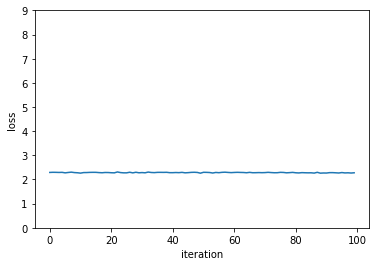

In [25]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
print("imported librarys")
from mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print("Data loaded.")

train_loss_list = []

iters_num = 100  # ハイパーパラメータ
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

print("loop start")
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    print("batched")
    # 勾配の計算
    grad = network.numerical_gradient(x_batch, t_batch)
    print("gradiented.")
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    #学習記録の更新
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    print(str(i+1) + "loop(s) ended")
# グラフの描画
x = np.arange(iters_num)
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.ylim(0, 9)
plt.show()